In [1]:
import pandas as pd
import glob 
import numpy as np
import re
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [3]:
MinPlay = pd.read_table("./inp.dat")
BoxPlay = pd.read_table("./out.dat")

(array([ 178.,  120.,  108.,  132.,  102.,  112.,   78.,   50.,   22.,   12.]),
 array([   10.45      ,   255.12166667,   499.79333333,   744.465     ,
          989.13666667,  1233.80833333,  1478.48      ,  1723.15166667,
         1967.82333333,  2212.495     ,  2457.16666667]),
 <a list of 10 Patch objects>)

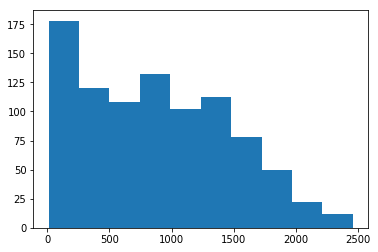

In [4]:
plt.hist(MinPlay.sum())

In [5]:
TotMinute = dict()
for (pname,val) in zip(MinPlay.columns,MinPlay.sum()):
    #print(pname[:-4],val)
    TotMinute[pname[:-4]] = val

In [6]:
BoxPlay.columns

Index([u'Center_2PMa', u'Center_2PMi', u'Center_3PMa', u'Center_3PMi',
       u'Center_FTMa', u'Center_FTMi', u'Center_ORrate', u'Center_TO',
       u'Point Guard_2PMa', u'Point Guard_2PMi', u'Point Guard_3PMa',
       u'Point Guard_3PMi', u'Point Guard_FTMa', u'Point Guard_FTMi',
       u'Point Guard_ORrate', u'Point Guard_TO', u'Power Forward_2PMa',
       u'Power Forward_2PMi', u'Power Forward_3PMa', u'Power Forward_3PMi',
       u'Power Forward_FTMa', u'Power Forward_FTMi', u'Power Forward_ORrate',
       u'Power Forward_TO', u'Shooting Guard_2PMa', u'Shooting Guard_2PMi',
       u'Shooting Guard_3PMa', u'Shooting Guard_3PMi', u'Shooting Guard_FTMa',
       u'Shooting Guard_FTMi', u'Shooting Guard_ORrate', u'Shooting Guard_TO',
       u'Small Forward_2PMa', u'Small Forward_2PMi', u'Small Forward_3PMa',
       u'Small Forward_3PMi', u'Small Forward_FTMa', u'Small Forward_FTMi',
       u'Small Forward_ORrate', u'Small Forward_TO'],
      dtype='object')

In [25]:
AllData = dict()

for test in list(BoxPlay.columns):
    clf = BayesianRidge(normalize=True)
    mod = clf.fit(MinPlay, BoxPlay[test])


    #Init dict
    for v in ["off","def"]:
        k = test+"_"+v
        AllData[k] = dict()

    for (pname,coef) in zip(MinPlay.columns.values,mod.coef_):
        sp = re.split("\.",pname)
        if len(sp) != 2:
            die
        k = test + "_"+ sp[1]
        if TotMinute[sp[0]] < 1000:
            continue
        AllData[k][sp[0]] = coef

In [26]:
df = pd.DataFrame(AllData)

In [46]:
for t in df.columns:
    print(t,df[t].sort_values(ascending=False).head(10),df[t].sort_values(ascending=False).tail(10))

('Center_2PMa_def', Greg_Monroe          0.000119
Enes_Kanter          0.000110
Bojan_Bogdanovic     0.000087
Jason_Smith          0.000069
Jonas_Valanciunas    0.000066
Robert_Covington     0.000060
George_Hill          0.000057
Derrick_Rose         0.000056
Dante_Exum           0.000055
Kyle_Singler         0.000053
Name: Center_2PMa_def, dtype: float64, Tony_Allen            -0.000072
Jamal_Crawford        -0.000072
Iman_Shumpert         -0.000073
Matthew_Dellavedova   -0.000074
Marcus_Morris         -0.000074
Eric_Bledsoe          -0.000074
Ersan_Ilyasova        -0.000078
Luol_Deng             -0.000086
Trey_Burke            -0.000094
Mike_Dunleavy         -0.000131
Name: Center_2PMa_def, dtype: float64)
('Center_2PMa_off', Enes_Kanter         0.000343
Hassan_Whiteside    0.000318
DeMarcus_Cousins    0.000283
Dwight_Howard       0.000282
Greg_Monroe         0.000268
Jodie_Meeks         0.000220
Nikola_Vucevic      0.000213
Robin_Lopez         0.000164
Mason_Plumlee       0.000163
A

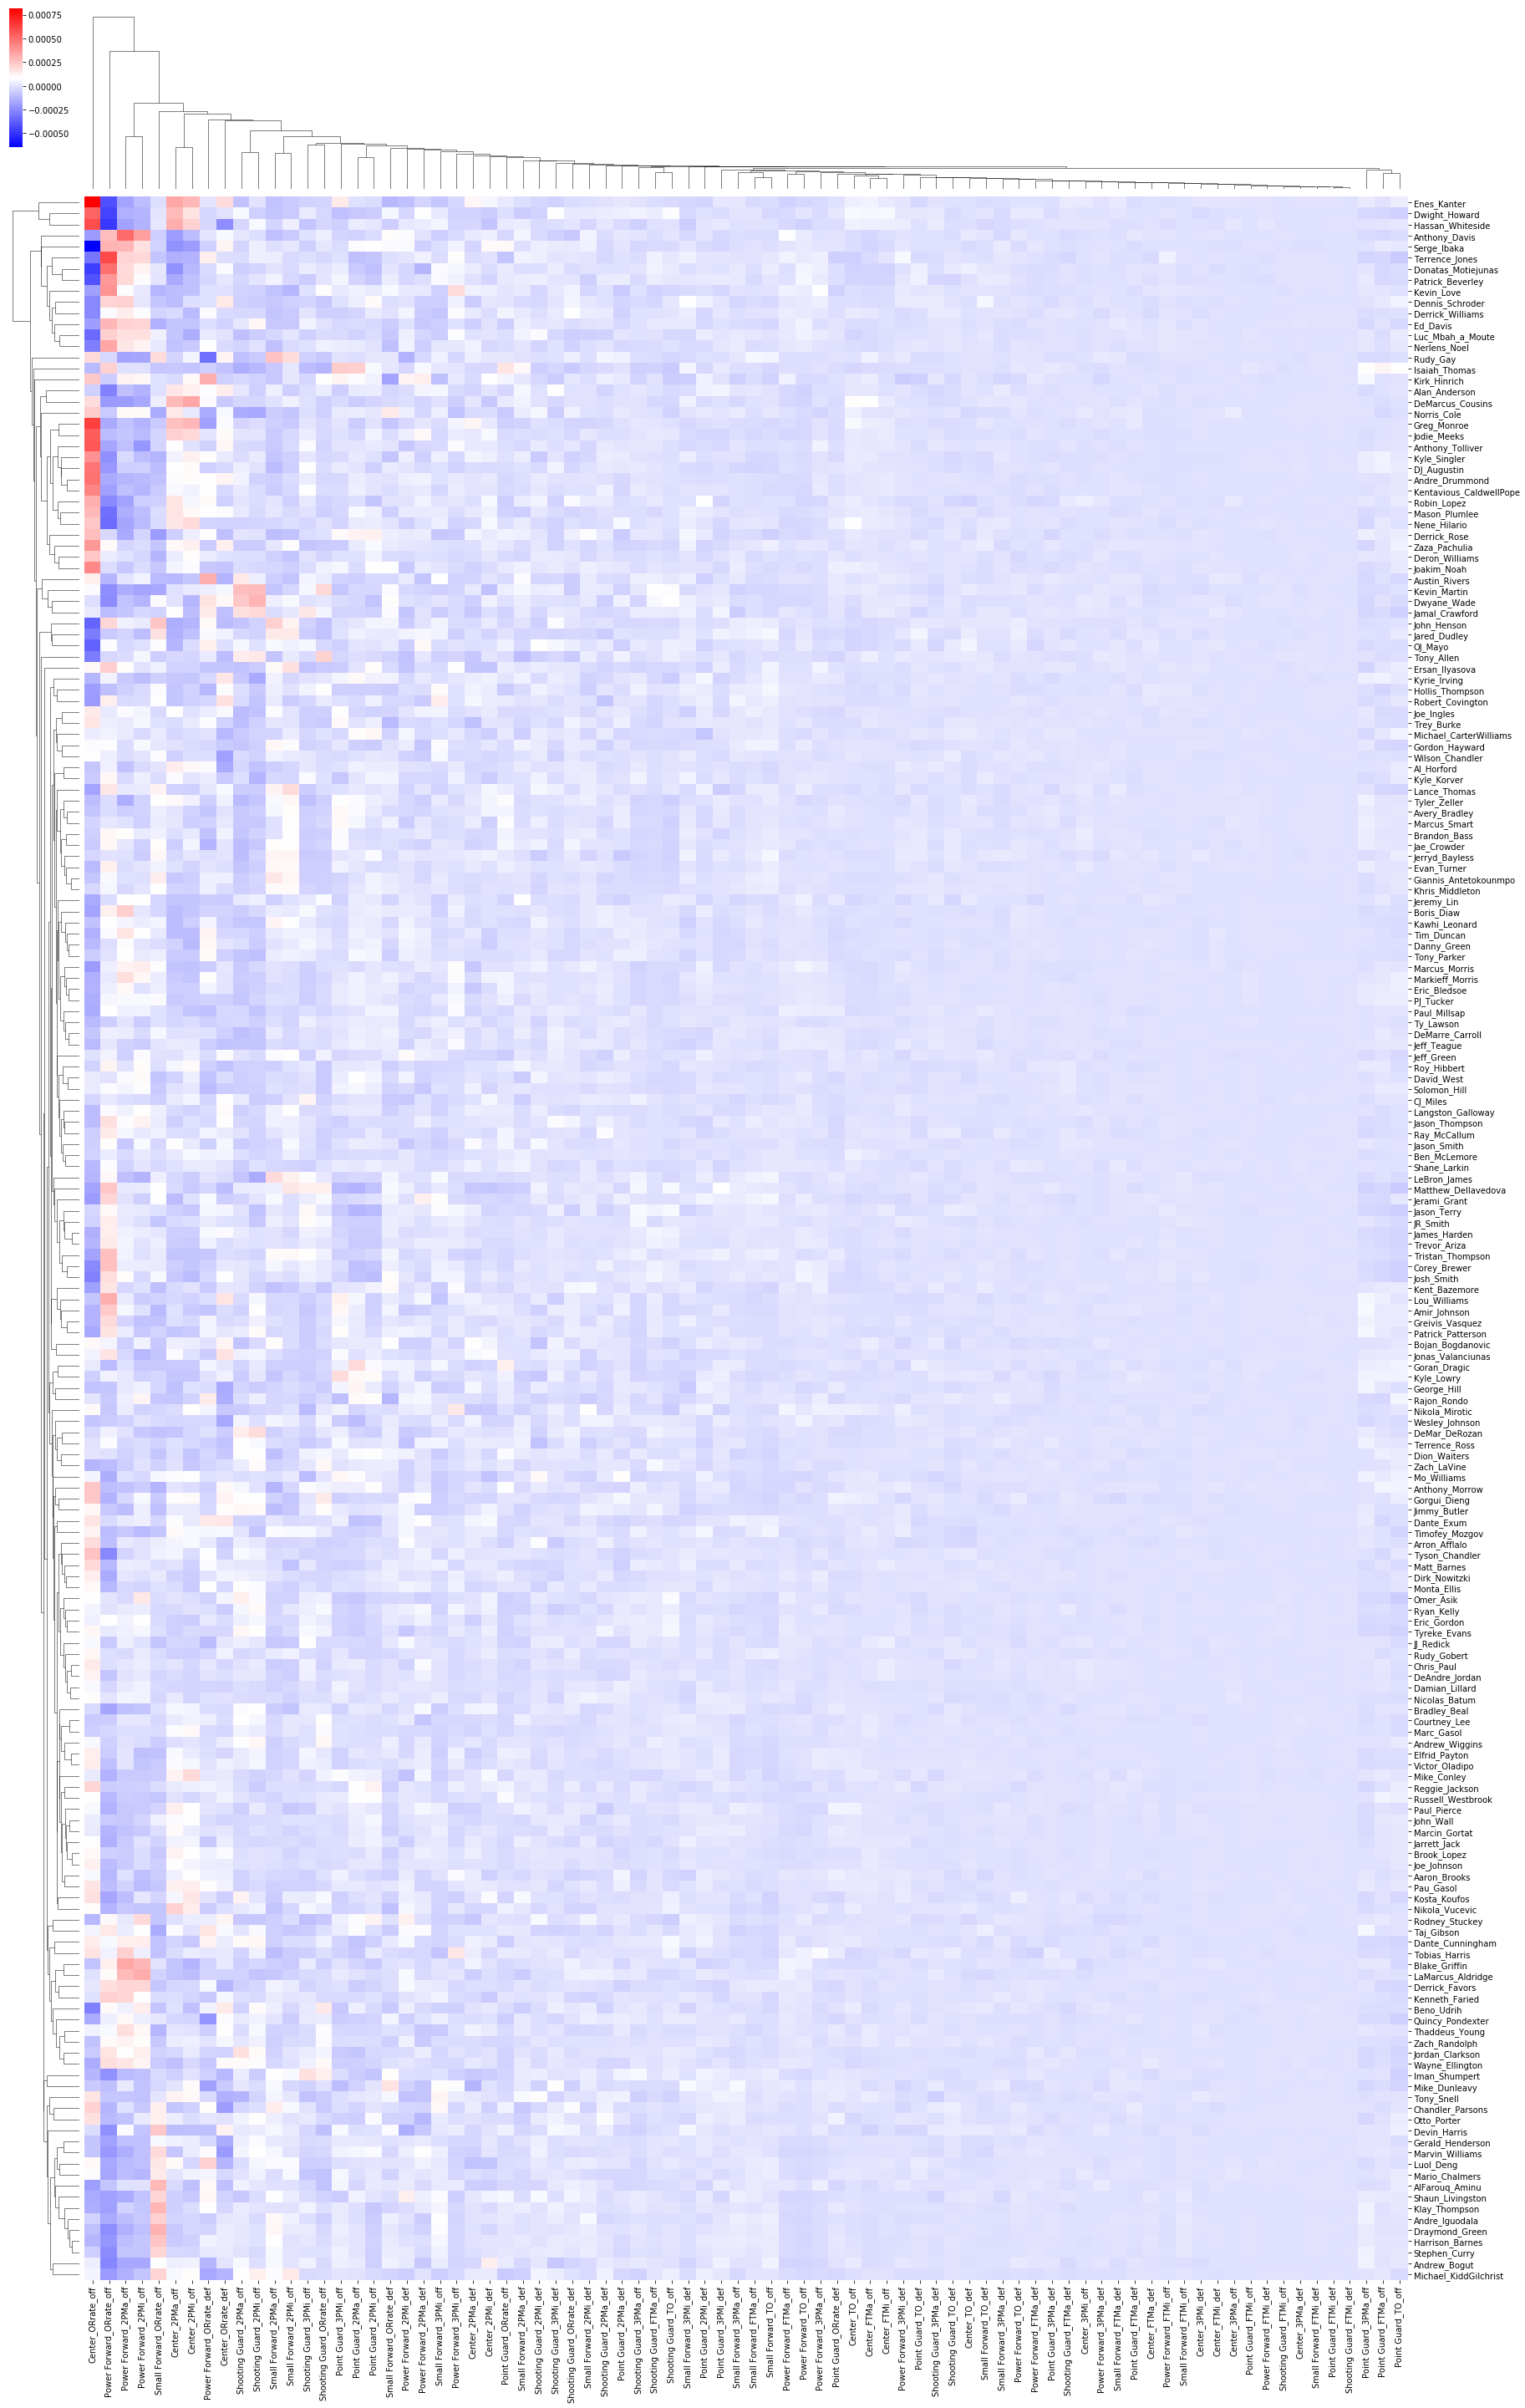

In [47]:
sns.clustermap(df,figsize=(30,50),cmap="bwr")

In [29]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=5).fit_transform(df)

In [40]:
from sklearn import metrics
from sklearn.cluster import KMeans
#y_pred = KMeans(n_clusters=10).fit_predict(df)
y_pred = KMeans(n_clusters=10).fit_predict(pca)

In [41]:
playnames = df.index.values
for lab in np.unique(y_pred):
    print(lab)
    print(playnames[y_pred == lab])

0
['Aaron_Brooks' 'Anthony_Morrow' 'Arron_Afflalo' 'Brook_Lopez'
 'DeAndre_Jordan' 'Deron_Williams' 'Derrick_Rose' 'Dirk_Nowitzki'
 'Elfrid_Payton' 'Goran_Dragic' 'Gorgui_Dieng' 'Jarrett_Jack'
 'Jimmy_Butler' 'Joe_Johnson' 'John_Wall' 'Kosta_Koufos' 'Marcin_Gortat'
 'Matt_Barnes' 'Mike_Conley' 'Mo_Williams' 'Monta_Ellis' 'Nikola_Vucevic'
 'Otto_Porter' 'Pau_Gasol' 'Paul_Pierce' 'Reggie_Jackson'
 'Russell_Westbrook' 'Timofey_Mozgov' 'Tony_Snell' 'Tyson_Chandler'
 'Victor_Oladipo']
1
['Beno_Udrih' 'Blake_Griffin' 'Boris_Diaw' 'Corey_Brewer' 'Danny_Green'
 'Derrick_Favors' 'Derrick_Williams' 'JR_Smith' 'James_Harden'
 'Jason_Terry' 'Jason_Thompson' 'Jerami_Grant' 'Jeremy_Lin' 'John_Henson'
 'Jordan_Clarkson' 'Josh_Smith' 'Kenneth_Faried' 'LaMarcus_Aldridge'
 'Marcus_Morris' 'Markieff_Morris' 'Matthew_Dellavedova' 'OJ_Mayo'
 'Paul_Millsap' 'Quincy_Pondexter' 'Tim_Duncan' 'Trevor_Ariza'
 'Tristan_Thompson' 'Wayne_Ellington' 'Zach_Randolph']
2
['Andrew_Wiggins' 'Austin_Rivers' 'Bradley_Beal'

In [57]:
dwst = df.transpose()["Dwight_Howard"]
ind = np.argsort(-abs(dwst))
plt.bar(range(0,10),dwst.values[ind[:10]])
plt.xticks(range(0,10),dwst.index.values[ind[:10]],rotation=90)
plt.title("Top Effect of Dwight Howard on stats")
plt.show()

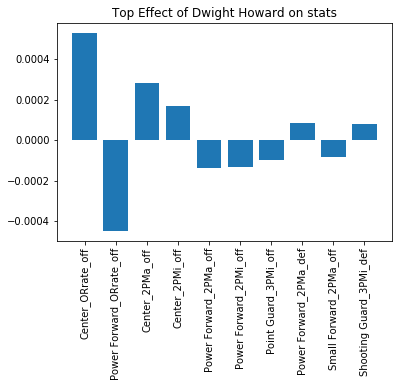

In [66]:
dwst = df.transpose()["Dwight_Howard"]
ind = np.argsort(-abs(dwst))
plt.bar(range(0,10),dwst.values[ind[:10]])
plt.xticks(range(0,10),dwst.index.values[ind[:10]],rotation=90)
plt.title("Top Effect of Dwight Howard on stats")
plt.show()

In [55]:
dwst.sort_values().head(10)

Power Forward_ORrate_off   -0.000448
Power Forward_2PMa_off     -0.000139
Power Forward_2PMi_off     -0.000131
Point Guard_3PMi_off       -0.000097
Small Forward_2PMa_off     -0.000085
Point Guard_2PMa_off       -0.000073
Small Forward_2PMi_off     -0.000066
Center_2PMi_def            -0.000062
Small Forward_2PMa_def     -0.000061
Point Guard_2PMi_off       -0.000060
Name: Dwight_Howard, dtype: float64

In [62]:
dwst.index.values[ind[:10]]

array(['Center_ORrate_off', 'Power Forward_ORrate_off', 'Center_2PMa_off',
       'Center_2PMi_off', 'Power Forward_2PMa_off',
       'Power Forward_2PMi_off', 'Point Guard_3PMi_off',
       'Power Forward_2PMa_def', 'Small Forward_2PMa_off',
       'Shooting Guard_3PMi_def'], dtype=object)